# Intro

Feture engineering & model tuning
- feature engineering - beginning stages, while prepping for analytics
- model tuning - end of project, model at satisfactory level, want to increase performance

feature engineering & eda

- most data not in state that can be used for eda

- 80% of effort in data prep


assumptions: given clear business requirements, kind of data, and where to get data from

often data from external (outside org) and internal sources

external sources - no control over structure
- scraping from web
- nosql
- rdbms
- etc


tech:
- hadoop stack
- pig
- hive

convert into single, common format

abt - analytics base table 


# Hands on Exercise - Feature Engineering

ensure no assumtions/ambiguity in column names as they will impact model

replace with median not mean
- mean not reliable; if extreme values fluctuate, mean will also fluctuate 
- median not likely to fluctuate


imputing inherently means biasing datasets
- replacing with median, sharpens curve, reduces variance for that column, reducing standard deviation
- strategies to handle missing values biases dataset

MICE - multiple imputations thru chained equation
- package in R
- not available in python yet

note down in project report, which columns had missing values, which strategy used to replace


sns.pairplot is a strong tool
- always look at diagonals first
- diagonals are density plot
- tails on the density plot indicate extreme values, outliers


missing values
- what are the reasons for missing values?
- if missing at random, no pattern, 
- patterns - people of age group/income bracket not reported those values

outliers
- data points which lie far away from other data points
- can be caused by various reasons
    - most common: typos
    - mixing up data from different processes - mixing up of the Gaussians
        - long tails, high variance, indicates presence of outliers
    - extreme event: rare event when data collected; low probability cases which can happen
        - drop or replace
        
mix up of Gaussians
- ex: combining data from large, medium, and small cars
- could have built a model for each class of car
- if split up, model becomes less representative

how to handle outliers
- +/- 2 stn dev considered outliers
    - could be 3, depends on how tight distributions are
- if replacing outliers with median, this will sharpen the curve and create new outliers


CAPPING
- replacing data points just outside the +/- 2 std dev with the +/- 2 std dev
- caution: if all outliers replaced with 2 std dev, will create new distribution

thoughts on replacing
- would it not make more sense to leave the data as is
- replacing etc would try to correct incorrect collection of data, etc, but leaving it would give us an accurate real world representation of what's happening, and yes, there may be errors, but the model would need to take account of those errors

**"research must be repeatable at every step"**

# Cross-Validation

- techniques used to estimate the perfomance of a model


- do not provide exact point estimates to stakeholders, instead give a range


- model's performance in training and testing is not a guarantee of performance in production
- depends on how well dataset in training/testing represent production
- how well samples represent the population
- in real world, cannot split into training/test, but would at lteast need training, validation, and test

Questions:
- why will the model not perform the same on production as in training/test?
- does this assume the data itself is different?
- is there an etl pipeline that transforms production data into data that will fit the model?
- how to graph performance?


- in absense of large data set, can employ techniques
- cannot rely on one round of testing

cross-validation:
- used to validate model's performance
- also gives range estimates
- validates multiple times

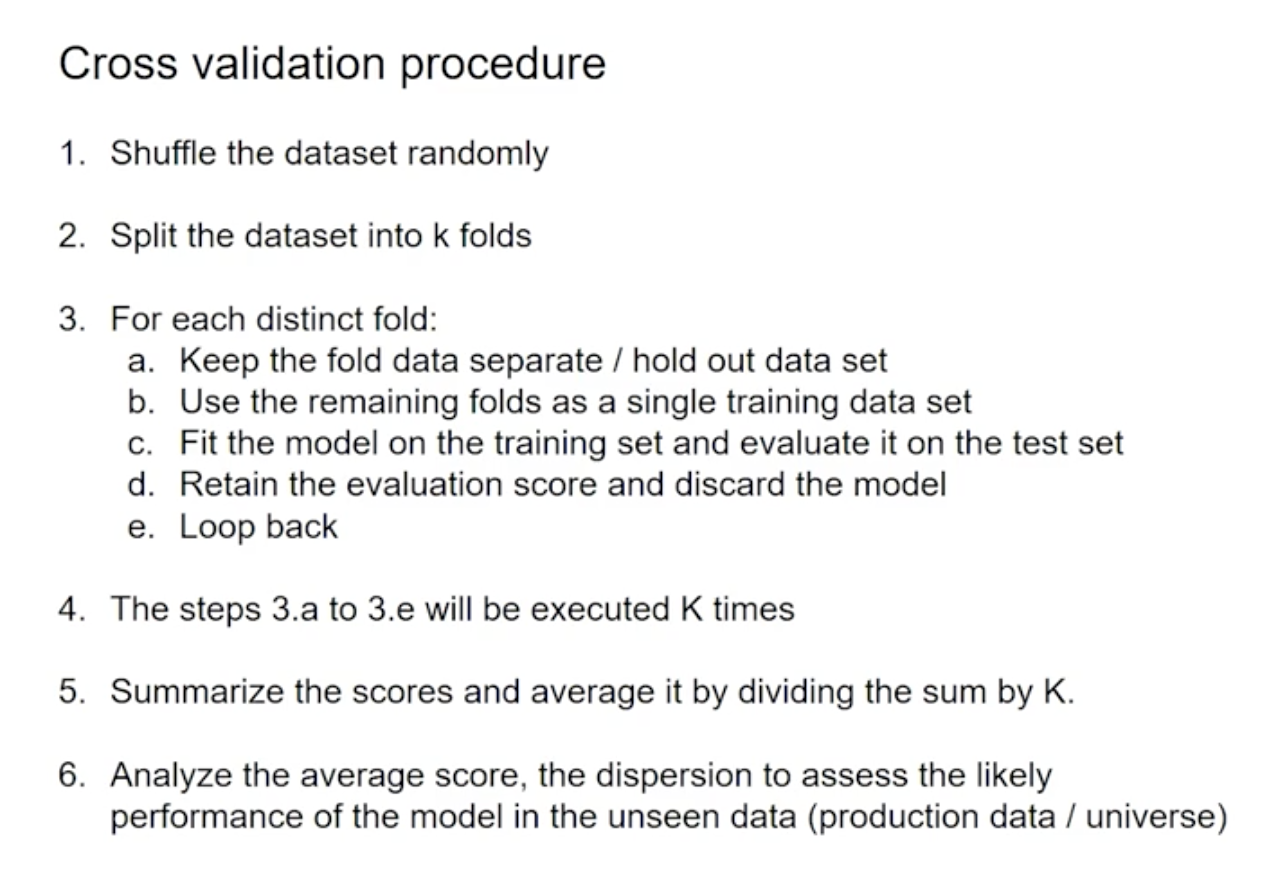


# Implementing K Fold Cross Validation

In [3]:
from numpy import array
from sklearn.model_selection import KFold
data = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
kfold = KFold(5, shuffle=True)
for train, test in kfold.split(data):
    print('train : %s, test %s' % (data[train], data[test]))

train : [10 20 30 40 50 60 70 80], test [ 90 100]
train : [ 10  20  40  50  70  80  90 100], test [30 60]
train : [ 20  30  40  50  60  70  90 100], test [10 80]
train : [ 10  20  30  40  60  80  90 100], test [50 70]
train : [ 10  30  50  60  70  80  90 100], test [20 40]


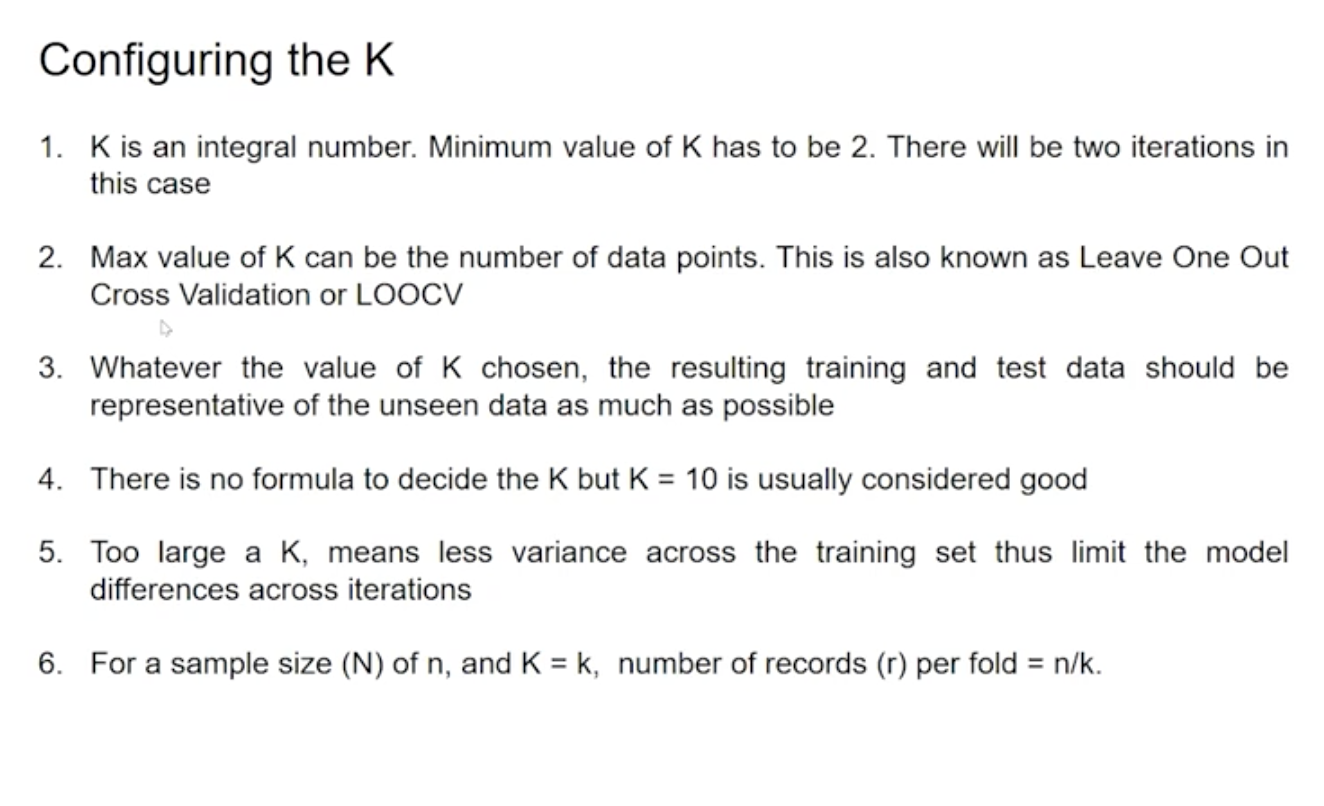

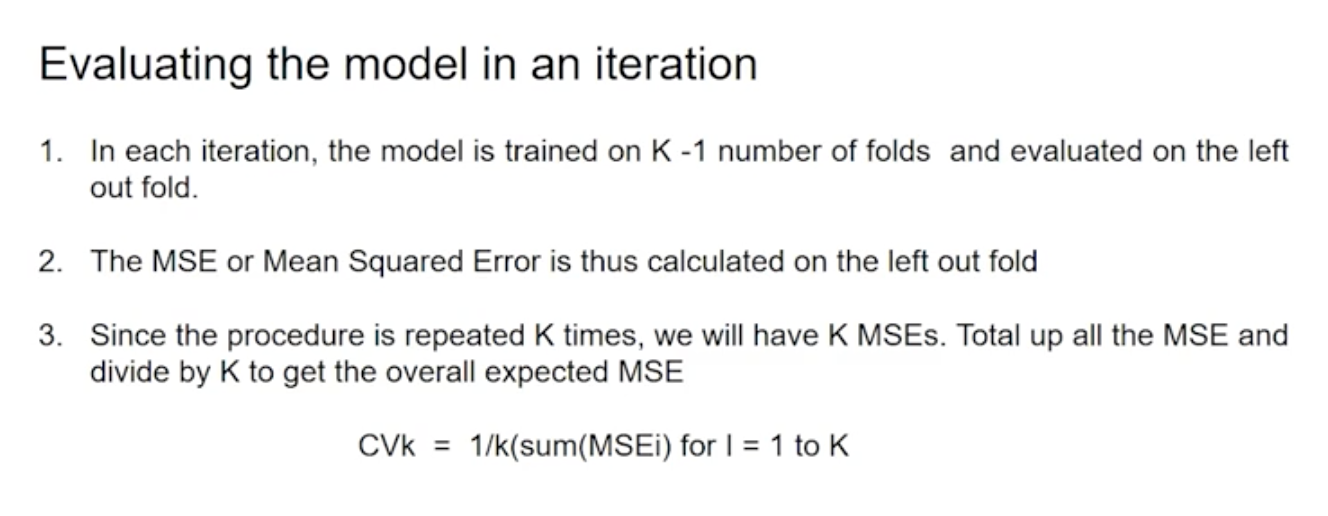

# Some salient features of K Fold

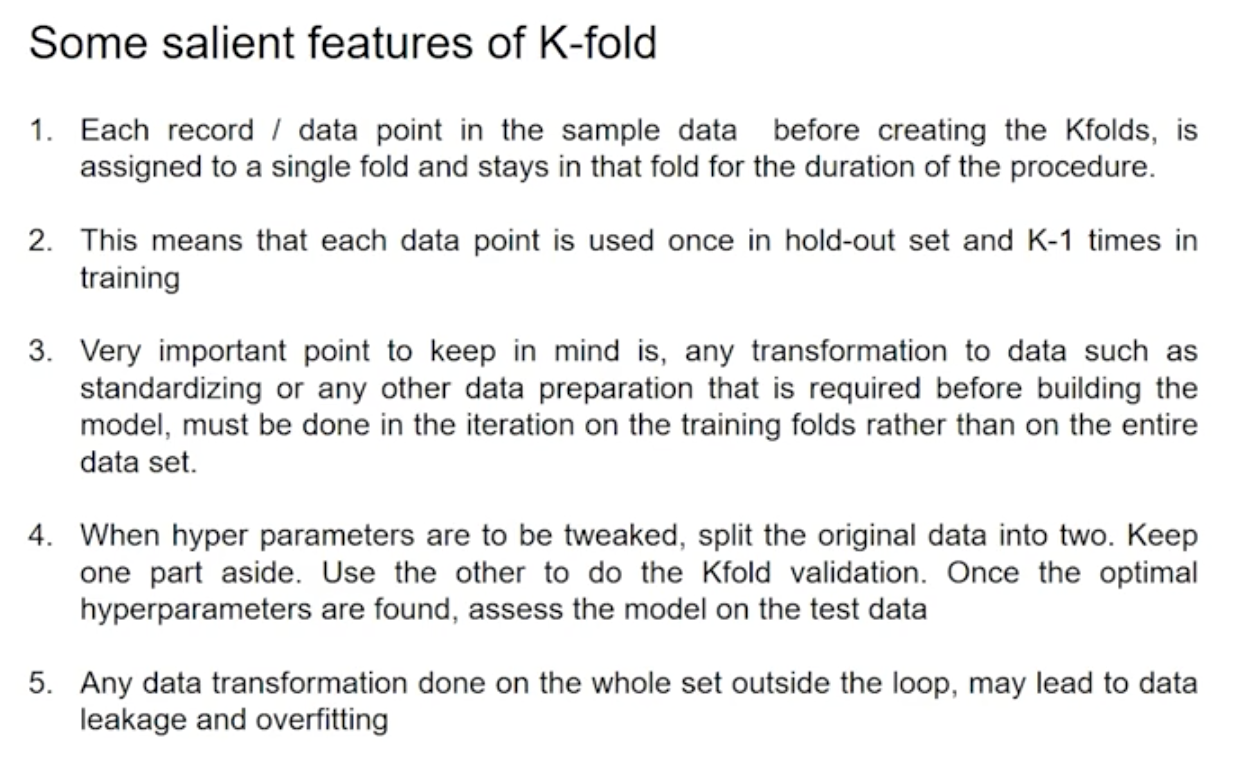

notes:
- transformations (ex: converting into scaled datasets) must be done as part of loop/iteration
- transformation should not be done first, then supplied to cross-validation function
- if hyper-parameters are to be used, use at least 3 splits: training, validation, testing

In [16]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[2,2]]))

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


# Hands On - Implementation of K-Fold Cross Validation Technique

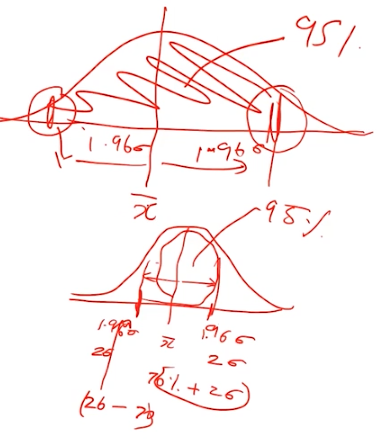

# Bootstrap Sampling Concept and Hands-on

also known as: sampling with replacement

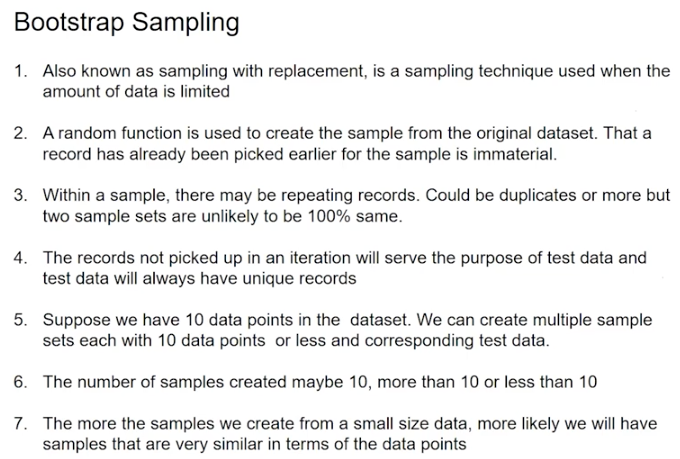

situation when restricted with dataset, data not large enough

technique uses random function to generate as much sample data as we wish

example:
- dataframe with 1000 records
- can use this method to generate 1,000 data files
- each datafile can have 1,000 records
- convential thought: 1,000 records, 1,000 files, each file should have 1 record
- with bootstrap sampling, you can generate as many samples as needed
- many records will be duplicate, **no two samples will be duplicates**
- every bootstrap sample will have corresponding out-of-bag (OOB) dataset, which can be used for testing


- central limit theorom 

# Leave one out Cross Validation (LOOCV) Concept

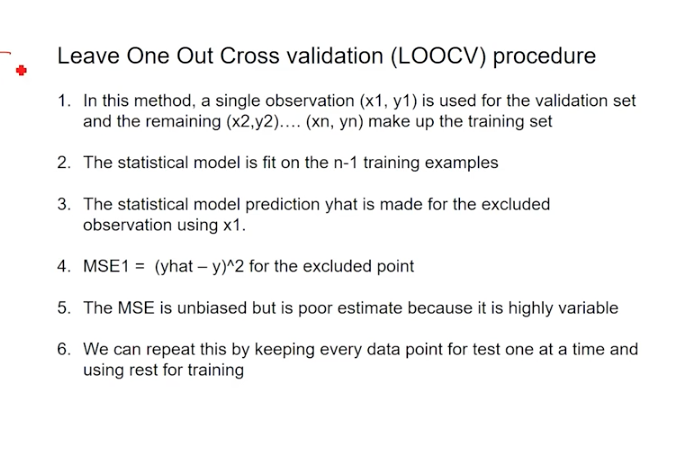

# Up sampling and down sampling

